# Redbull

## Importando a Base 

In [172]:
import pandas as pd

redbull = pd.read_csv('Redbull.csv', sep = ',')
redbull.head()

Volunteer_ID   sex agegrp  bp_before  bp_after  Unnamed: 5
0             1  Male  30-45        143       153         NaN
1             2  Male  30-45        163       170         NaN
2             3  Male  30-45        153       168         NaN
3             4  Male  30-45        153       168         NaN
4             5  Male  30-45        146       161         NaN

In [291]:
redbull.shape

(120, 5)

## Descritiva

In [173]:
redbull.drop(columns= ['Unnamed: 5'], inplace = True)
redbull.head()

Volunteer_ID   sex agegrp  bp_before  bp_after
0             1  Male  30-45        143       153
1             2  Male  30-45        163       170
2             3  Male  30-45        153       168
3             4  Male  30-45        153       168
4             5  Male  30-45        146       161

In [180]:
redbull.groupby(by = ['sex']).count()

Volunteer_ID  agegrp  bp_before  bp_after
sex                                              
Female            60      60         60        60
Male              60      60         60        60

In [186]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(redbull, values=redbull.sex.value_counts(), names=['Maculino','Feminino'] ,   title='Quantidade de pessoas por sexo no estudo')
fig.show()

In [187]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(redbull, values=redbull.agegrp.value_counts(),    title='Quantidade de pessoas por grupo de idade no estudo')
fig.show()

In [181]:
redbull.groupby(by = ['agegrp']).count()

Volunteer_ID  sex  bp_before  bp_after
agegrp                                        
30-45             40   40         40        40
46-59             40   40         40        40
60+               40   40         40        40

In [182]:
import plotly.express as px

fig = px.box(redbull,x='agegrp', y="bp_before", color='agegrp')
fig.show()

In [183]:
import plotly.express as px

fig = px.box(redbull,x='agegrp', y="bp_after", color='agegrp')
fig.show()

In [184]:
import pandas_profiling 

pandas_profiling.ProfileReport(redbull)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1500x1000 with 0 Axes>

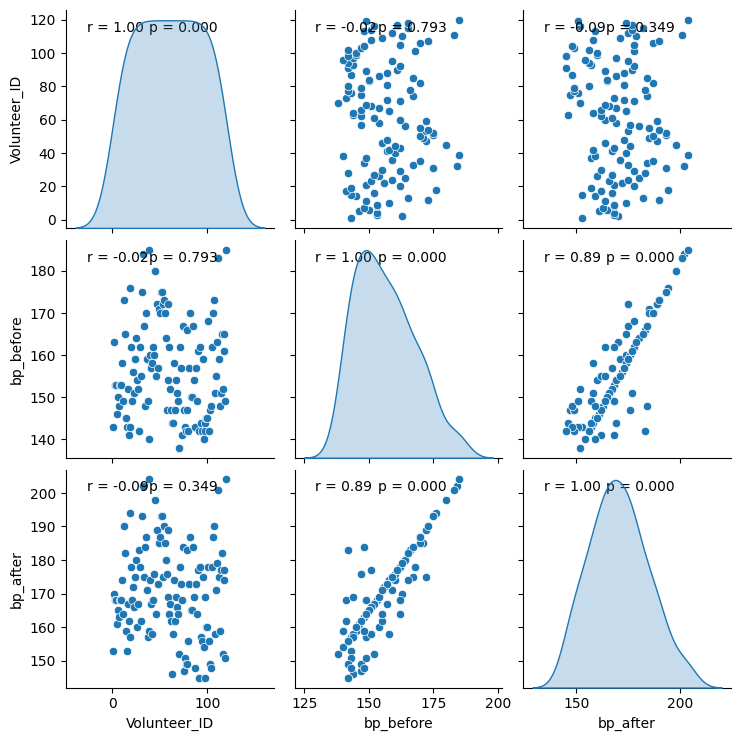

In [198]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(redbull, diag_kind="kde")
graph.map(corrfunc)
plt.show()

## Transformando a Base

In [237]:
redbull_transformado = redbull.copy()
redbull_transformado.head()

Volunteer_ID   sex agegrp  bp_before  bp_after
0             1  Male  30-45        143       153
1             2  Male  30-45        163       170
2             3  Male  30-45        153       168
3             4  Male  30-45        153       168
4             5  Male  30-45        146       161

In [238]:
redbull_transformado = pd.get_dummies(data= redbull_transformado, columns=['sex','agegrp'], drop_first = True)
redbull_transformado.head()

Volunteer_ID  bp_before  bp_after  sex_Male  agegrp_46-59  agegrp_60+
0             1        143       153         1             0           0
1             2        163       170         1             0           0
2             3        153       168         1             0           0
3             4        153       168         1             0           0
4             5        146       161         1             0           0

In [239]:
redbull_transformado.drop(columns = ['Volunteer_ID'], inplace = True)
redbull_transformado.head()

bp_before  bp_after  sex_Male  agegrp_46-59  agegrp_60+
0        143       153         1             0           0
1        163       170         1             0           0
2        153       168         1             0           0
3        153       168         1             0           0
4        146       161         1             0           0

In [240]:
redbull_transformado.rename(columns={'bp_before':'antes',
                                     'bp_after':'depois',
                                     'sex_Male':'sexo',
                                     'agegrp_46-59':'entre_46_59',
                                     'agegrp_60+': 'maior_de_60'}, inplace=True)
redbull_transformado

antes  depois  sexo  entre_46_59  maior_de_60
0      143     153     1            0            0
1      163     170     1            0            0
2      153     168     1            0            0
3      153     168     1            0            0
4      146     161     1            0            0
..     ...     ...   ...          ...          ...
115    152     152     0            0            1
116    161     177     0            0            1
117    165     174     0            0            1
118    149     151     0            0            1
119    185     204     0            0            1

[120 rows x 5 columns]

In [282]:
pandas_profiling.ProfileReport(redbull_transformado)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [241]:
redbull_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   antes        120 non-null    int64
 1   depois       120 non-null    int64
 2   sexo         120 non-null    uint8
 3   entre_46_59  120 non-null    uint8
 4   maior_de_60  120 non-null    uint8
dtypes: int64(2), uint8(3)
memory usage: 2.4 KB


## Teste de hipotese

### Teste de Normalidade

#### H0: Se o p < 0.05, a população não possui distribuição normal
#### H1: Se o p > 0.05, a população possui distribuição normal

In [ ]:
import cv2
imagem = cv2.imread("shapiro.png")
cv2.imshow("Original", imagem) #pip install opencv-python

<AxesSubplot: >

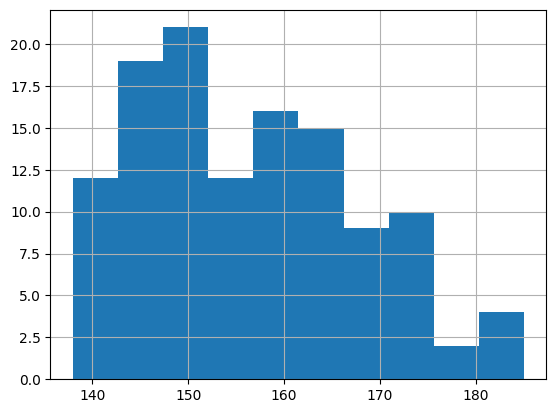

In [301]:
redbull.bp_before.hist()

In [300]:
from scipy.stats import shapiro

stats, p = shapiro(redbull['bp_before'])
print(stats, p)

0.9547789096832275 0.0004928590497002006


<AxesSubplot: >

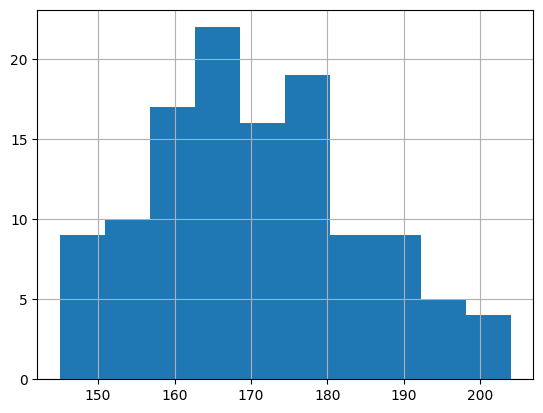

In [302]:
redbull.bp_after.hist()

In [299]:
from scipy.stats import shapiro

stats, p = shapiro(redbull['bp_after'])
print(stats, p)

0.9835571050643921 0.1519709825515747


### Teste T para duas amostras

#### 
#### 

In [ ]:
import cv2
imagem = cv2.imread("testet.png")
cv2.imshow("Original", imagem) #pip install opencv-python

In [297]:
from scipy.stats import ttest_rel
import numpy as np

np.random.seed(42)
a = redbull['bp_before']
b = redbull['bp_after']

print(
    'Não rejeita a hipótese nula: {}'.format(ttest_rel(a, b))
)

Não rejeita a hipótese nula: Ttest_relResult(statistic=-24.152330553479292, pvalue=1.0678080687675268e-47)


## Regressão

In [242]:
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
from scipy.stats import pearsonr # correlações de Pearson
from sklearn.preprocessing import LabelEncoder # transformação de dados

In [243]:
redbull_transformado['entre_46_59']

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: entre_46_59, Length: 120, dtype: uint8

In [245]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo = sm.OLS.from_formula("depois ~ antes + sexo + entre_46_59 + maior_de_60", redbull_transformado).fit()

#Parâmetros do modelo
print(modelo.summary())

#Parâmetros dos modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
print(modelo.conf_int(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                 depois   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     116.3
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.81e-39
Time:                        14:17:00   Log-Likelihood:                -388.11
No. Observations:                 120   AIC:                             786.2
Df Residuals:                     115   BIC:                             800.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3133      8.603     -0.269      

In [246]:

redbull_transformado['depoisfit'] = modelo.fittedvalues
redbull_transformado


antes  depois  sexo  entre_46_59  maior_de_60   depoisfit
0      143     153     1            0            0  156.648624
1      163     170     1            0            0  178.695979
2      153     168     1            0            0  167.672301
3      153     168     1            0            0  167.672301
4      146     161     1            0            0  159.955727
..     ...     ...   ...          ...          ...         ...
115    152     152     0            0            1  163.305797
116    161     177     0            0            1  173.227107
117    165     174     0            0            1  177.636578
118    149     151     0            0            1  159.998694
119    185     204     0            0            1  199.683933

[120 rows x 6 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

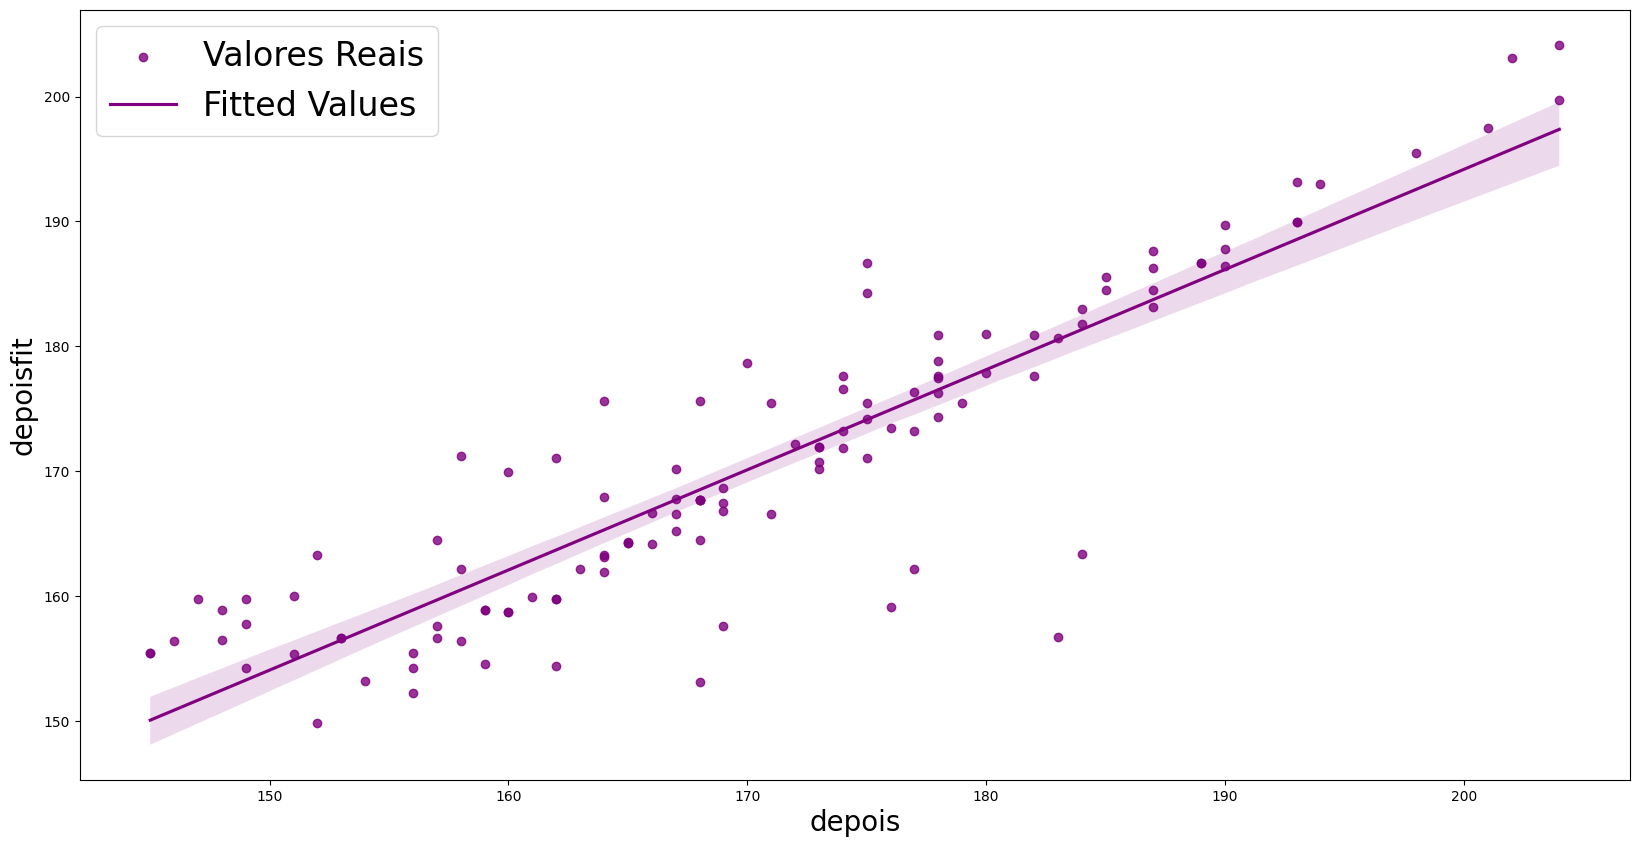

In [249]:
# In[ ]: Plotando o novo gráfico com intervalo de confiança de 95%
#Note o estreitamento da amplitude dos intervalos de confiança!

plt.figure(figsize=(20,10))
sns.regplot(data=redbull_transformado, x='depois', y='depoisfit', ci=95, color='purple')
plt.xlabel('depois', fontsize=20)
plt.ylabel('depoisfit', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show


In [250]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiro_francia' do pacote
#'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/
# pip install statstests
from statstests.tests import shapiro_francia
shapiro_francia(modelo.resid)

# Interpretação
teste_sf = shapiro_francia(modelo.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')



method  :  Shapiro-Francia normality test
statistics W  :  0.8576882675940489
statistics z  :  5.42434120362267
p-value  :  2.9084337732015792e-08
method  :  Shapiro-Francia normality test
statistics W  :  0.8576882675940489
statistics z  :  5.42434120362267
p-value  :  2.9084337732015792e-08
Statistics W=0.85769, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


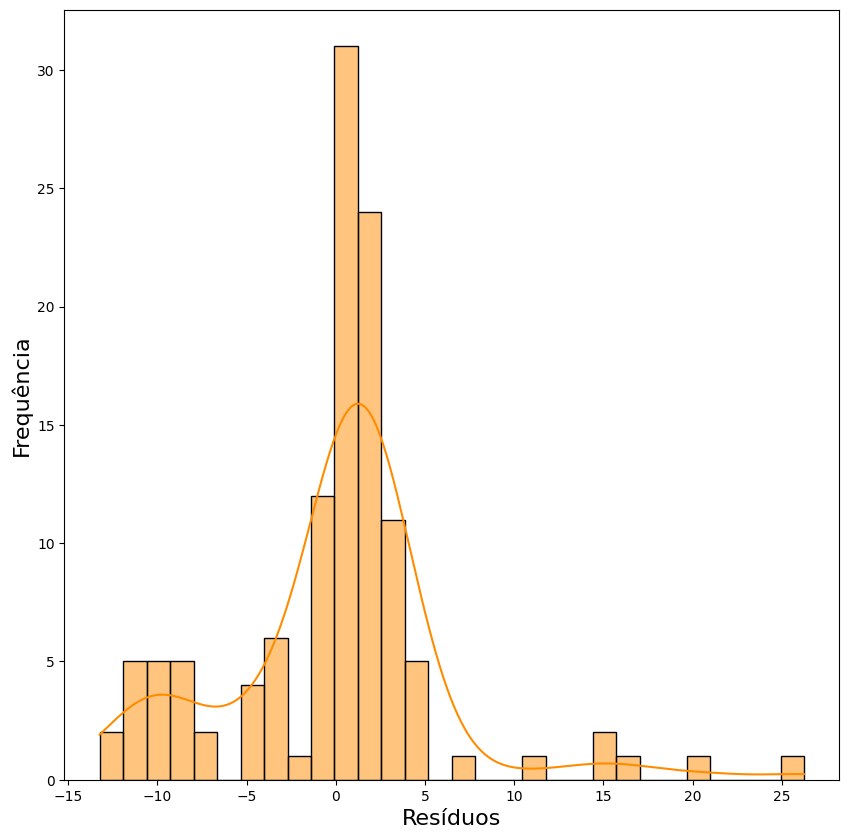

In [251]:
# In[ ]: Histograma dos resíduos do modelo OLS linear

plt.figure(figsize=(10,10))
sns.histplot(data=modelo.resid, kde=True, bins=30, color = 'darkorange')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

### Stepwise

In [313]:
from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step = stepwise(modelo, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 depois ~ Q('antes') + Q('sexo') + Q('entre_46_59') + Q('maior_de_60')

 Discarding atribute "Q('entre_46_59')" with p-value equal to 0.39898871018052184 

Estimating model...: 
 depois ~ Q('antes') + Q('sexo') + Q('maior_de_60')

 Discarding atribute "Q('sexo')" with p-value equal to 0.2814303966877554 

Estimating model...: 
 depois ~ Q('antes') + Q('maior_de_60')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('entre_46_59')", 'p-value': 0.39898871018052184}
{'atribute': "Q('sexo')", 'p-value': 0.2814303966877554}

 Model after stepwise process...: 
 depois ~ Q('antes') + Q('maior_de_60') 

                            OLS Regression Results                            
Dep. Variable:                 depois   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:    

In [314]:
# In[ ]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox e stepwise

modelo_step = sm.OLS.from_formula('depois ~ antes  + maior_de_60', redbull_transformado).fit()

#Parâmetros do modelo
modelo_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 depois   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     231.9
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.98e-41
Time:                        17:41:23   Log-Likelihood:                -389.08
No. Observations:                 120   AIC:                             784.2
Df Residuals:                     117   BIC:                             792.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.6090      8.407     -0.548      0.585     -21.258      12.040
antes           1.1256      0.055     20.609      0.000       1.017       1.234
maior_de_60    -2.7536      1.314     -2.095      0.038      -5.356      -0.151
==============================================================================
Omnibus:                       31.679   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.995
Skew:                           0.878   Prob(JB):                     2.62e-23
Kurtosis:                       7.209   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia
shapiro_francia(modelo_step.resid)

# Interpretação
teste_sf = shapiro_francia(modelo_step.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.8309563223557048
statistics z  :  5.768625900173701
p-value  :  3.9960247538800415e-09
method  :  Shapiro-Francia normality test
statistics W  :  0.8309563223557048
statistics z  :  5.768625900173701
p-value  :  3.9960247538800415e-09
Statistics W=0.83096, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


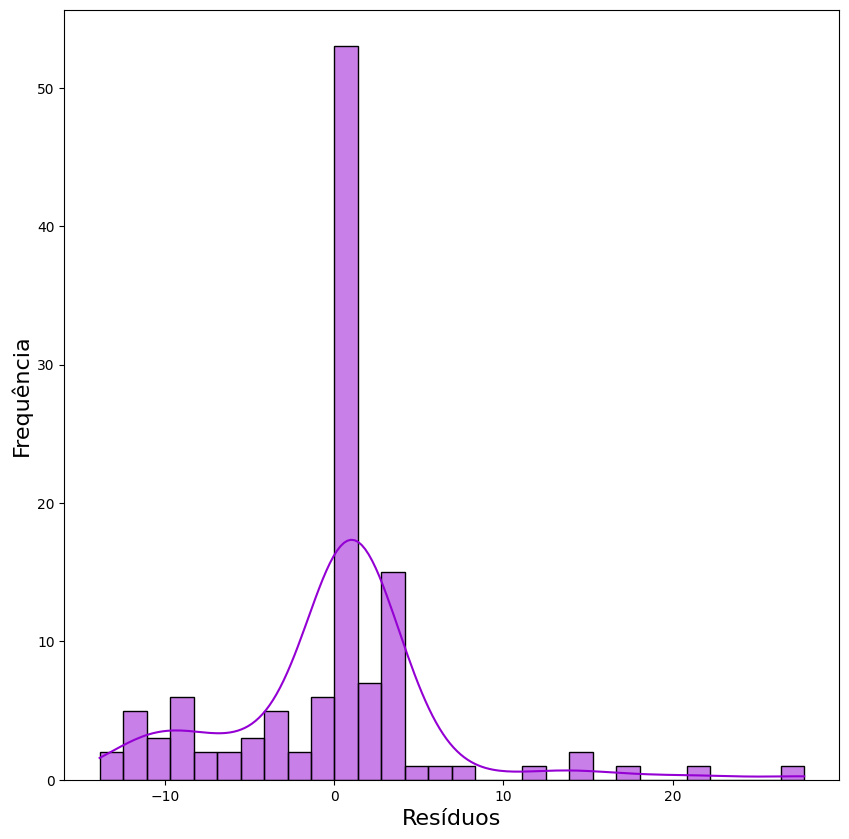

In [316]:
# In[ ]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_step.resid, kde=True, bins=30, color='darkviolet')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

### Box-Cox

In [274]:
# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(redbull_transformado['depois'])

In [275]:

#Inserindo a variável transformada ('bc_comprimento') no dataset
#para a estimação de um novo modelo
redbull_transformado['bc_depois'] = x

redbull_transformado

antes  depois  sexo  entre_46_59  maior_de_60   depoisfit  bc_depois  \
0      143     153     1            0            0  156.648624   1.841886   
1      163     170     1            0            0  178.695979   1.850237   
2      153     168     1            0            0  167.672301   1.849320   
3      153     168     1            0            0  167.672301   1.849320   
4      146     161     1            0            0  159.955727   1.845980   
..     ...     ...   ...          ...          ...         ...        ...   
115    152     152     0            0            1  163.305797   1.841352   
116    161     177     0            0            1  173.227107   1.853320   
117    165     174     0            0            1  177.636578   1.852021   
118    149     151     0            0            1  159.998694   1.840812   
119    185     204     0            0            1  199.683933   1.863689   

     yhat_linear  yhat_modelo_bc  
0     156.648624      157.189855  
1     178.695979      178.124192  
2     167.672301      167.166997  
3     167.672301      167.166997  
4     159.955727      160.087177  
..           ...             ...  
115   163.305797      162.691510  
116   173.227107      172.108614  
117   177.636578      176.558212  
118   159.998694      159.723587  
119   199.683933      201.620937  

[120 rows x 9 columns]

In [276]:
# In[ ]: Estimando um novo modelo OLS com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_depois ~ antes + maior_de_60', redbull_transformado).fit()

#Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              bc_depois   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     200.5
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.57e-38
Time:                        14:38:37   Log-Likelihood:                 528.79
No. Observations:                 120   AIC:                            -1052.
Df Residuals:                     117   BIC:                            -1043.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7724      0.004    442.402      0.000       1.764       1.780
antes           0.0005    2.6e-05     19.181      0.000       0.000       0.001
maior_de_60    -0.0013      0.001     -2.001      0.048      -0.002   -1.31e-05
==============================================================================
Omnibus:                       21.792   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.199
Skew:                           0.568   Prob(JB):                     4.22e-15
Kurtosis:                       6.457   Cond. No.                     2.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [277]:
# In[ ]: Comparando os parâmetros do 'modelo_linear' com os do 'modelo_bc'
#CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

summary_col([modelo, modelo_bc])

#Outro modo mais completo também pela função 'summary_col'
summary_col([modelo, modelo_bc],
            model_names=["MODELO LINEAR","MODELO BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

#Repare que há um salto na qualidade do ajuste para o modelo não linear (R²)

pd.DataFrame({'R² OLS':[round(modelo.rsquared,4)],
              'R² Box-Cox':[round(modelo_bc.rsquared,4)]})


R² OLS  R² Box-Cox
0  0.8018      0.7742

In [278]:
# In[ ]: Verificando a normalidade dos resíduos do 'modelo_bc'

# Teste de Shapiro-Francia
shapiro_francia(modelo_bc.resid)

# Interpretação
teste_sf = shapiro_francia(modelo_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.8461872158331234
statistics z  :  5.579778322318453
p-value  :  1.2041265414145811e-08
method  :  Shapiro-Francia normality test
statistics W  :  0.8461872158331234
statistics z  :  5.579778322318453
p-value  :  1.2041265414145811e-08
Statistics W=0.84619, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


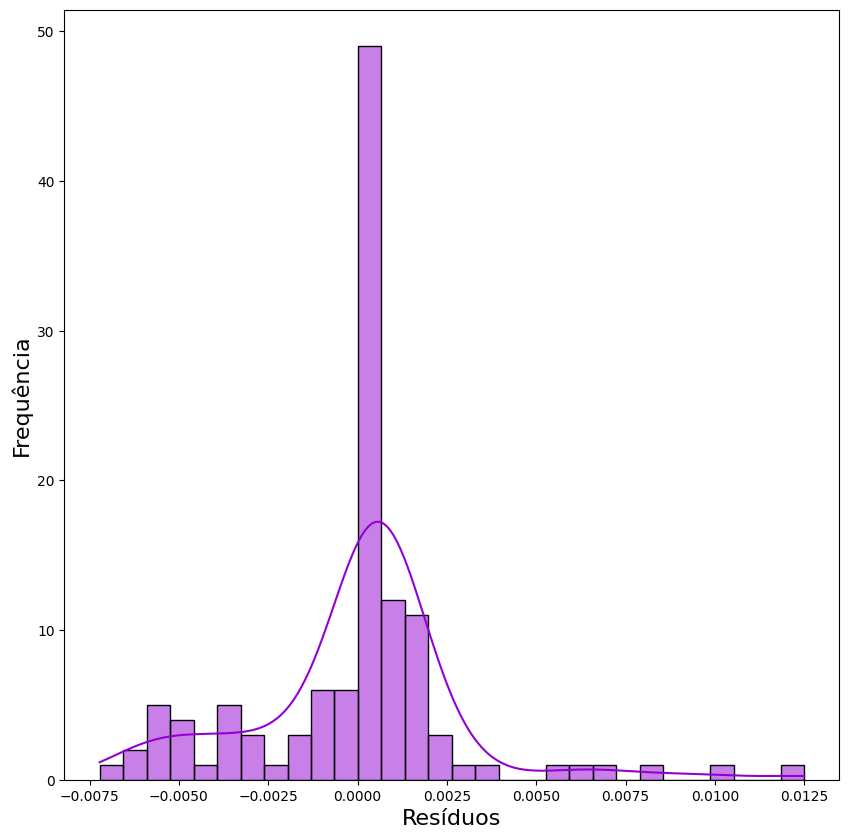

In [279]:
# In[ ]: Histograma dos resíduos do modelo_bc

plt.figure(figsize=(10,10))
sns.histplot(data=modelo_bc.resid, kde=True, bins=30, color='darkviolet')
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequência', fontsize=16)
plt.show()

In [280]:
redbull_transformado['yhat_linear'] = modelo.fittedvalues
redbull_transformado['yhat_modelo_bc'] = (modelo_bc.fittedvalues * lmbda + 1) ** (1 / lmbda)
redbull_transformado


antes  depois  sexo  entre_46_59  maior_de_60   depoisfit  bc_depois  \
0      143     153     1            0            0  156.648624   1.841886   
1      163     170     1            0            0  178.695979   1.850237   
2      153     168     1            0            0  167.672301   1.849320   
3      153     168     1            0            0  167.672301   1.849320   
4      146     161     1            0            0  159.955727   1.845980   
..     ...     ...   ...          ...          ...         ...        ...   
115    152     152     0            0            1  163.305797   1.841352   
116    161     177     0            0            1  173.227107   1.853320   
117    165     174     0            0            1  177.636578   1.852021   
118    149     151     0            0            1  159.998694   1.840812   
119    185     204     0            0            1  199.683933   1.863689   

     yhat_linear  yhat_modelo_bc  
0     156.648624      156.703874  
1     178.695979      178.141439  
2     167.672301      166.908051  
3     167.672301      166.908051  
4     159.955727      159.664684  
..           ...             ...  
115   163.305797      163.215287  
116   173.227107      172.938572  
117   177.636578      177.540870  
118   159.998694      160.155720  
119   199.683933      203.556887  

[120 rows x 9 columns]

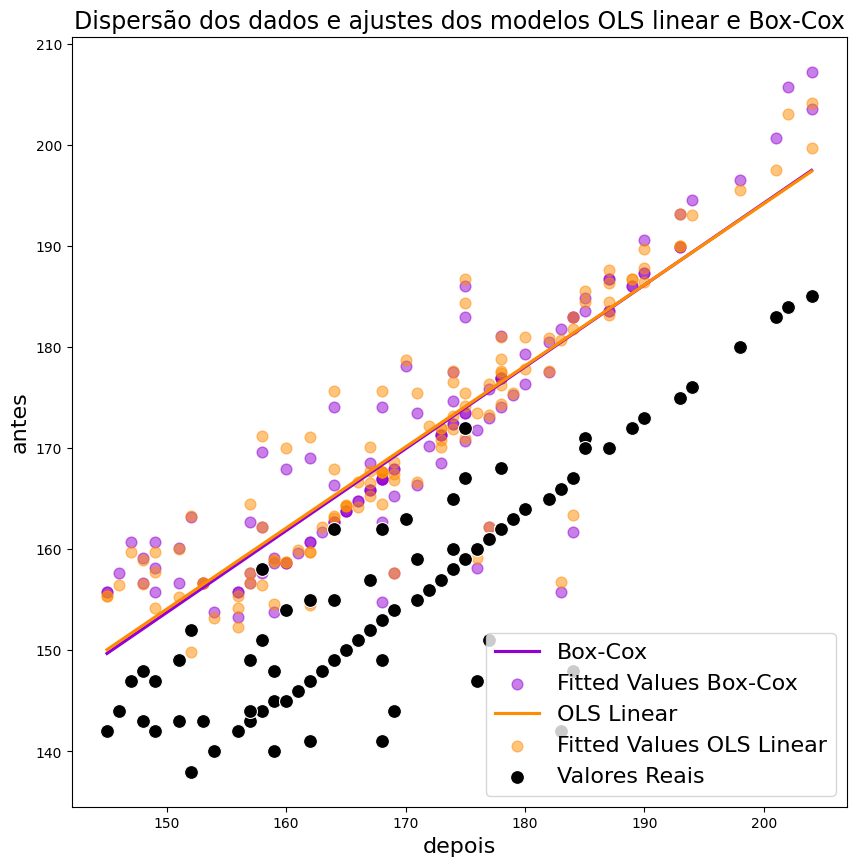

In [281]:
# In[ ]: Gráfico de dispersão com ajustes dos modelos OLS linear e Box-Cox

plt.figure(figsize=(10,10))
sns.regplot(x="depois", y="yhat_modelo_bc", data=redbull_transformado, order=lmbda,
            color='darkviolet', ci=False, scatter=False, label='Box-Cox')
plt.scatter(x="depois", y="yhat_modelo_bc", data=redbull_transformado, alpha=0.5,
            s=60, color='darkviolet', label='Fitted Values Box-Cox')
sns.regplot(x="depois", y="yhat_linear", data=redbull_transformado,
            color='darkorange', ci=False, scatter=False, label='OLS Linear')
plt.scatter(x="depois", y="yhat_linear", data=redbull_transformado, alpha=0.5,
            s=60, color='darkorange', label='Fitted Values OLS Linear')
sns.scatterplot(x="depois", y="antes", data=redbull_transformado, color='black',
                s=100, label='Valores Reais')
plt.title('Dispersão dos dados e ajustes dos modelos OLS linear e Box-Cox',
          fontsize=17)
plt.xlabel('depois', fontsize=16)
plt.ylabel('antes', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()